In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('D:\\insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.shape

(1338, 7)

In [7]:
df.size

9366

In [8]:
tab = pd.DataFrame(index=df.columns)
tab['data_type'] = df.dtypes
tab['null_count'] = df.isnull().sum()
tab['unique_count'] = df.nunique()

In [9]:
tab

,data_type,null_count,unique_count
age,int64,0,47
sex,object,0,2
bmi,float64,0,548
children,int64,0,6
smoker,object,0,2
region,object,0,4
charges,float64,0,1337


In [10]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


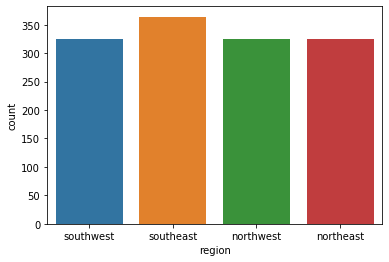

In [11]:
sns.countplot(x='region',data=df)

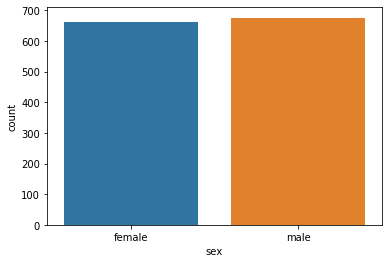

In [12]:
sns.countplot(x='sex',data=df)

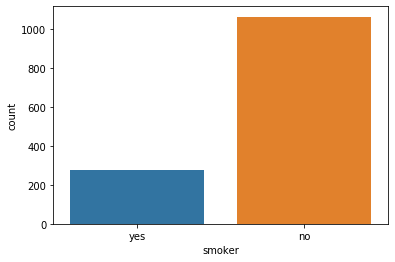

In [13]:
sns.countplot(x='smoker',data=df)

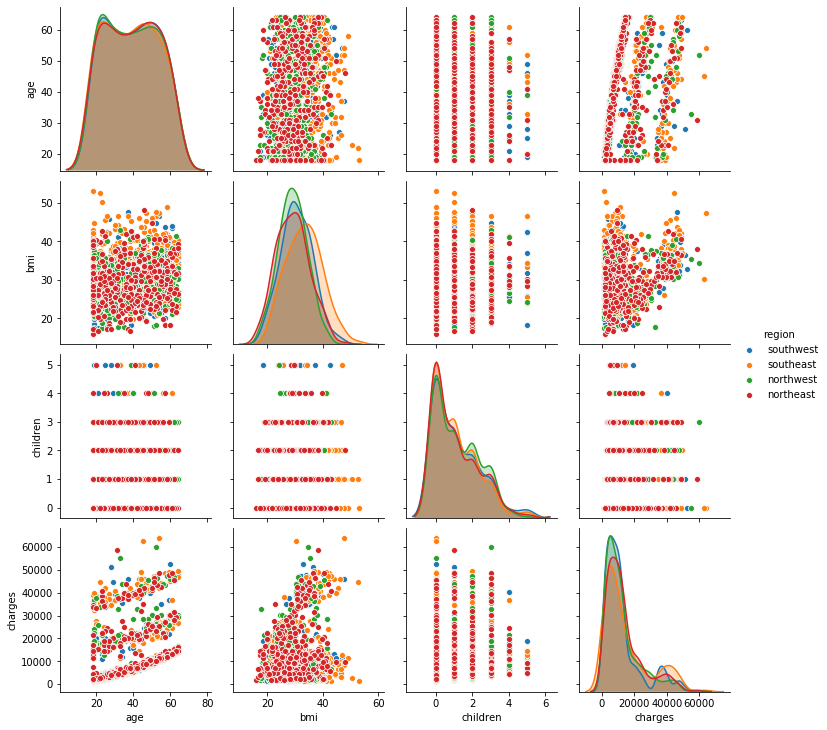

In [14]:
sns.pairplot(df,hue='region')

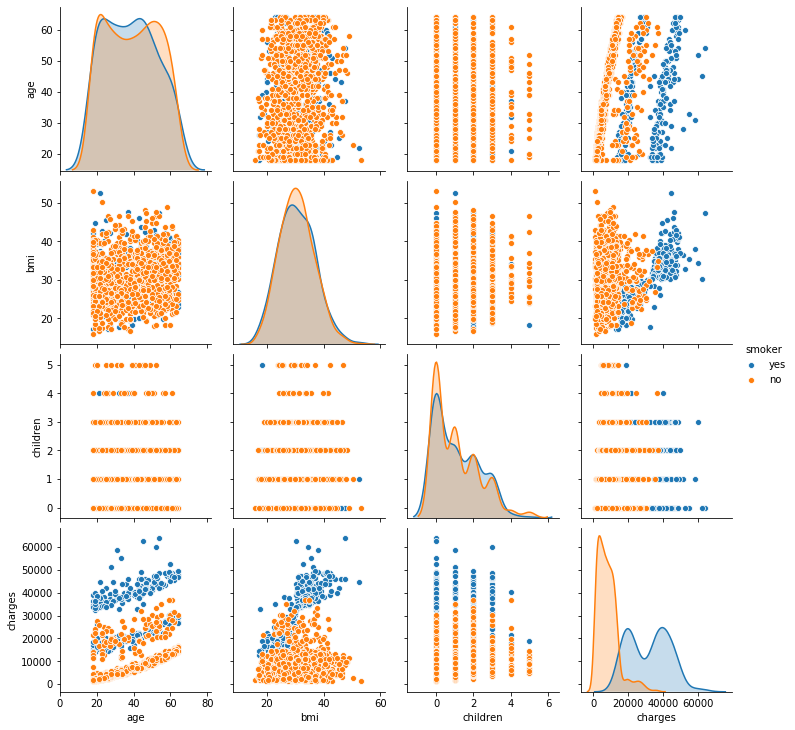

In [15]:
sns.pairplot(df,hue='smoker')

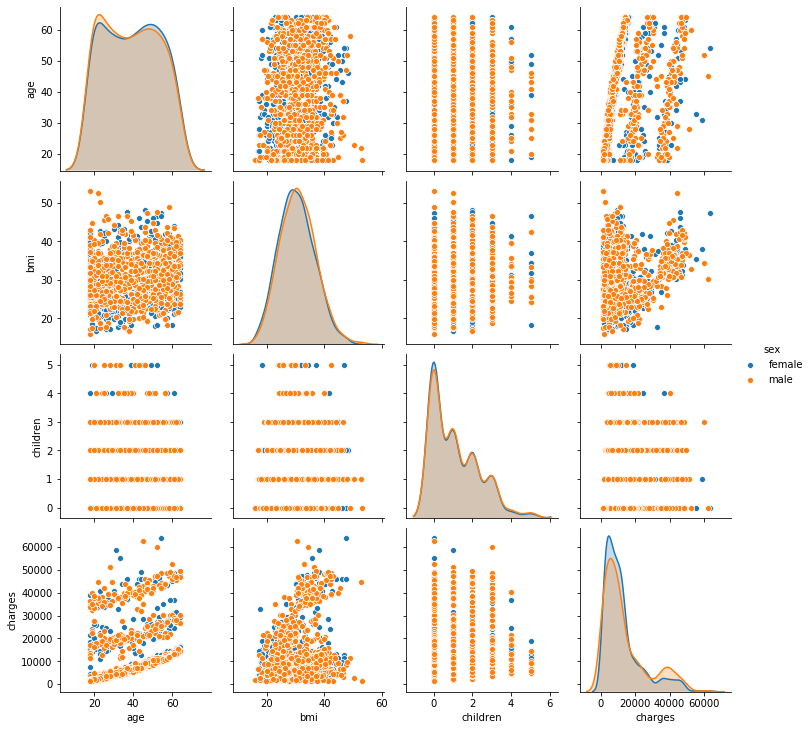

In [16]:
sns.pairplot(df,hue='sex')

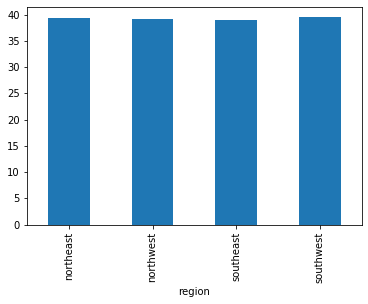

In [17]:
df.groupby('region')['age'].mean().plot.bar()

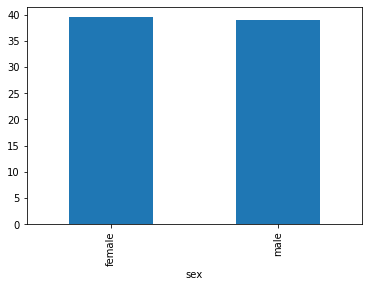

In [18]:
df.groupby('sex')['age'].mean().plot.bar()

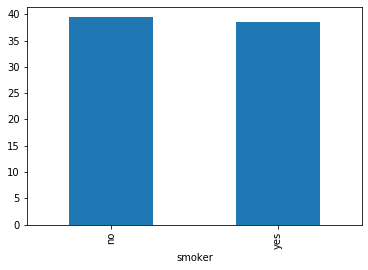

In [19]:
df.groupby('smoker')['age'].mean().plot.bar()

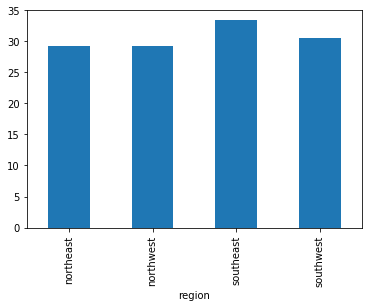

In [20]:
df.groupby('region')['bmi'].mean().plot.bar()

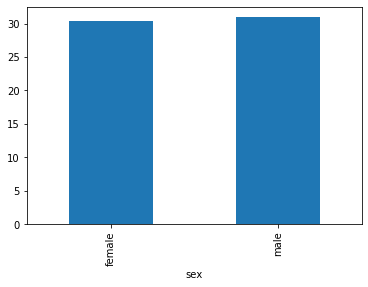

In [21]:
df.groupby('sex')['bmi'].mean().plot.bar()

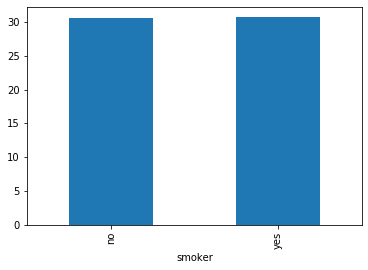

In [22]:
df.groupby('smoker')['bmi'].mean().plot.bar()

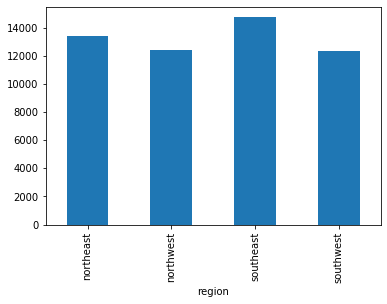

In [23]:
df.groupby('region')['charges'].mean().plot.bar()

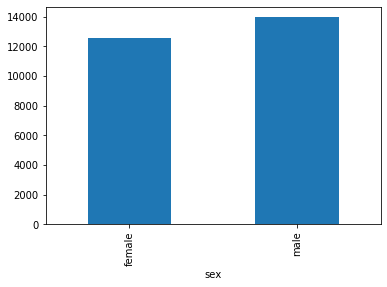

In [24]:
df.groupby('sex')['charges'].mean().plot.bar()

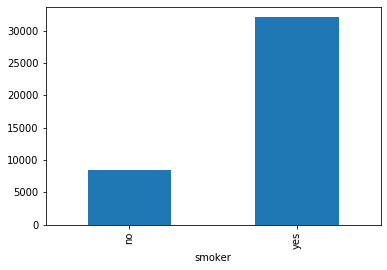

In [25]:
df.groupby('smoker')['charges'].mean().plot.bar()

(6, 0)

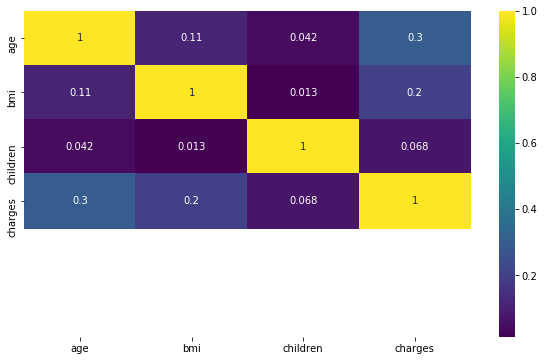

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(6,0)

In [27]:
df2 = pd.get_dummies(df)

In [28]:
df2.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [29]:
col = list(df2.columns)
xcol = []
for i in col:
    if i!='charges':
        xcol.append(i)

In [30]:
X = df2[xcol].values
X[0:5]

array([[19.   , 27.9  ,  0.   ,  1.   ,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ],
       [18.   , 33.77 ,  1.   ,  0.   ,  1.   ,  1.   ,  0.   ,  0.   ,
         0.   ,  1.   ,  0.   ],
       [28.   , 33.   ,  3.   ,  0.   ,  1.   ,  1.   ,  0.   ,  0.   ,
         0.   ,  1.   ,  0.   ],
       [33.   , 22.705,  0.   ,  0.   ,  1.   ,  1.   ,  0.   ,  0.   ,
         1.   ,  0.   ,  0.   ],
       [32.   , 28.88 ,  0.   ,  0.   ,  1.   ,  1.   ,  0.   ,  0.   ,
         1.   ,  0.   ,  0.   ]])

In [31]:
Y = df2['charges'].values
Y[0:5]

array([16884.924  ,  1725.5523 ,  4449.462  , 21984.47061,  3866.8552 ])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train , x_test , y_train , y_test = train_test_split( X , Y , test_size = 0.2 , random_state = 4)  

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
model = RandomForestRegressor(n_estimators = 150).fit(x_train , y_train)

In [36]:
y_hat = model.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score,mean_squared_error

In [38]:
print('MSE : ',mean_squared_error(y_test,y_hat))

MSE :  23623503.968900595


In [39]:
model.score(x_test,y_test)

0.8168095743569913

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
model2 = GradientBoostingRegressor().fit(x_train , y_train)

In [42]:
y_predict = model2.predict(x_test)

In [43]:
model2.score(x_test,y_test)

0.8376282050001957

In [44]:
print('MSE : ',mean_squared_error(y_test,y_predict))

MSE :  20938816.699352864
